##Part(a) - Implementing Gradient Descent

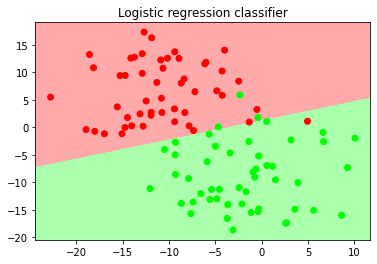

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
from math import exp

# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)
    
# implementation of gradient descent for logistic regression
def grad_desc(theta, x, y, alpha, tol, maxiter):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):
        theta = theta - (alpha * log_grad(theta, x, y)) 
        nll_vec.append(neg_log_like(theta, x, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        iter += 1
    return theta, np.array(nll_vec), iter

# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Initialize theta to zero
theta = np.zeros(shape[1]+1)

# Run gradient descent
alpha = 1e-3
tol = 1e-3
maxiter = 10000
theta, cost, iter = grad_desc(theta, xtilde, y, alpha, tol, maxiter)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()

##Part(c)

Number of iteration required for convergence:

 Number of iterations for alpha: [1, 1, 1, 1, 739, 897, 467, 196, 7, 4, 2, 2]

 Number of iterations for tol: [2213, 1782, 1357, 942, 543, 172, 1, 1, 1, 1, 1, 1]


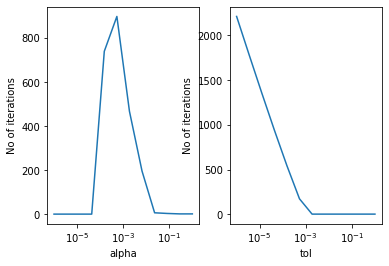

In [15]:
def convergence(theta, xtilde, y):
 
    # define criteria as a logspace between 10 ** -6 & 1
    alpha = np.logspace(-6, 0, 12, endpoint=True)
    tol = np.logspace(-6, 0, 12, endpoint=True)
    
    print('Number of iteration required for convergence:')
    
    # list to store the number of iterations
    iter_alpha = []
    iter_tol = []
 
    for a in alpha:
        _, _, iter = grad_desc(theta, xtilde, y, a, 0.1e-3, maxiter)
        iter_alpha.append(iter)
 
    for t in tol:
        _, _, iter = grad_desc(theta, xtilde, y, 0.001, t, maxiter)
        iter_tol.append(iter)
 
    print('\n Number of iterations for alpha:' , (iter_alpha))
    print('\n Number of iterations for tol:' , (iter_tol))
    
    #Plotting
    plt.figure()
    plt.subplot(121)
    plt.semilogx(alpha, iter_alpha)
    plt.xlabel('alpha')
    plt.ylabel('No of iterations')
 
    plt.subplot(122)
    plt.semilogx(tol, iter_tol)
    plt.xlabel('tol')
    plt.ylabel('No of iterations')
 
    plt.show()
 
convergence(theta, xtilde, y)


##Part(d)

In [21]:
import time
def question(theta, xtilde, y, tol, sample=50, verbose=False):

  
  
    iter_grad_desc = []
    time_grad_desc = []


    for i in range(sample):
        if verbose:
            print('\nRun : ', i)

        start_time = time.time()
        _, _, iter1 = grad_desc(theta, xtilde, y, alpha, tol, maxiter)
        time_grad_desc.append(time.time() - start_time)
        iter_grad_desc.append(iter1)
        if verbose:
            print('time : ', time.time() - start_time)
            print('iterations: ', iter1)

    print('\n Number of iterations :', np.mean(iter_grad_desc))
    print('\n Run time  : ', np.mean(time_grad_desc))


question(theta, xtilde, y, tol, sample=3, verbose=False) 


 Number of iterations : 1.0

 Run time  :  0.00019582112630208334
